# Flight Dataset Exploration
## by Leslie Rodriguez

## Investigation Overview

In this investigation, I wanted to look at the characteristics of flights to understand the amount of delays that occur. The main focus was on the following features: Origin and Destination Airports, Weather and Carrier Delays, Overall ActualElapsedTime.

## Dataset Overview

The flight dataset in this project reports flights in the United States, including information on carriers, arrival and departure delays, and reasons for delays, from 2008. The data comes originally from RITA where it is described in detail here - https://www.transtats.bts.gov/Fields.asp?Table_ID=236. <br> The dataset has over 7+ million rows, although for my project, I used a sample of 1 million rows. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
flights_2008_df_all = pd.read_csv('../Flight Data/2008.csv')
flights_2008_df = flights_2008_df_all.sample(n=1000000,random_state=42)

## Distribution of Delays

For the distribution of arrival delays, I can see that the arrival delay centers around 0 minutes, with about slightly more than half the flights experiencing positive minutes of delay versus the slightly less than half experiencing negative delays (arriving earlier than expected). Looking at the distribution of departure delays, I can see that the majority of the departures are less than 50 minutes. With a smaller amount of delays that stretch beyond 90 minutes.

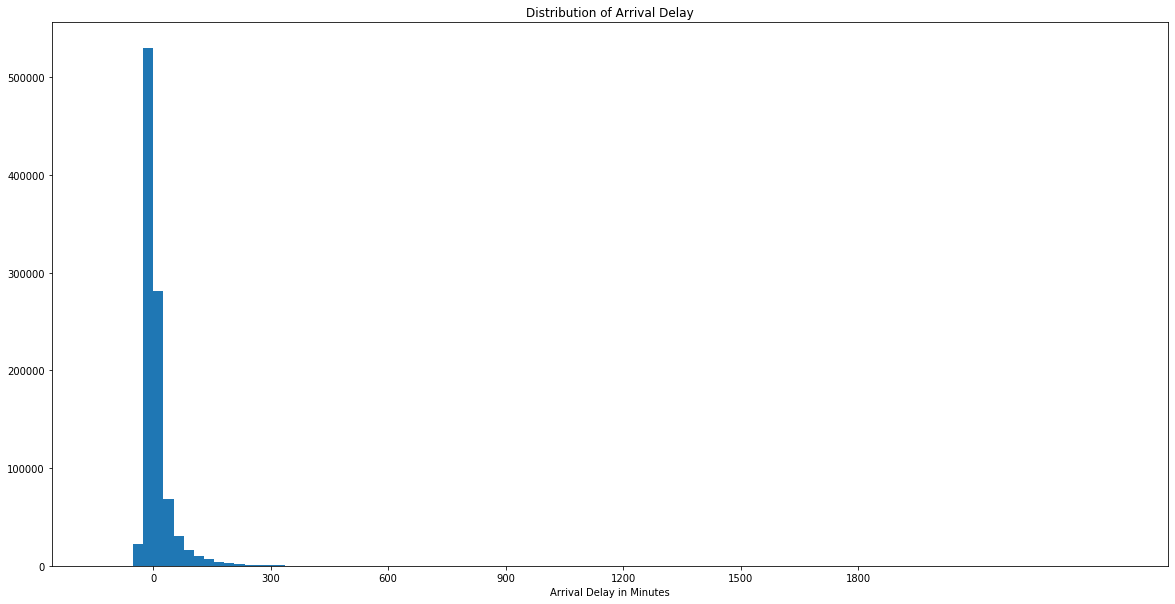

In [3]:
plt.figure(figsize=[20, 10])
plt.hist(data = flights_2008_df, x = 'ArrDelay', bins = 100)
plt.xlabel('Arrival Delay in Minutes')
plt.xticks(np.arange(0, 2000, step=300))
plt.title('Distribution of Arrival Delay')
plt.show()

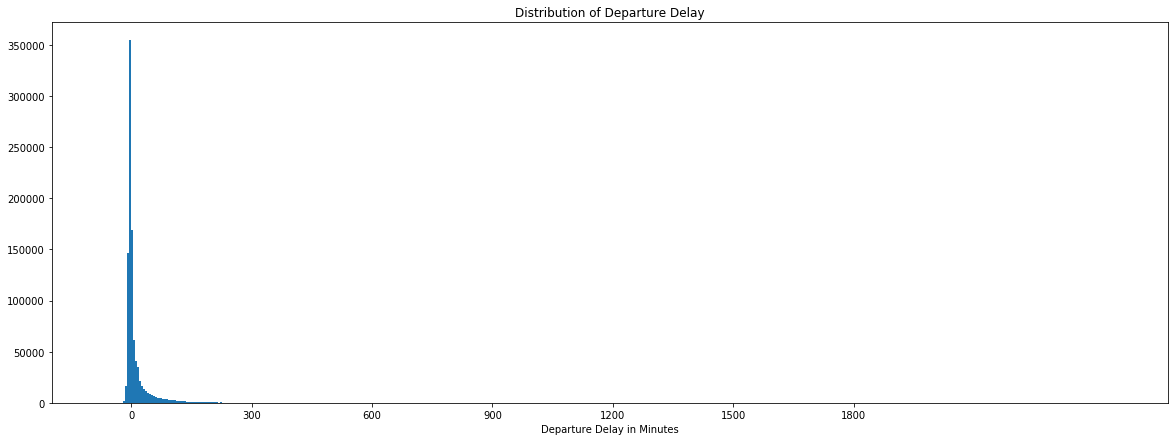

In [4]:
plt.figure(figsize=[20, 7])
plt.hist(data = flights_2008_df, x = 'DepDelay', bins = 500)
plt.xlabel('Departure Delay in Minutes')
plt.xticks(np.arange(0, 2000, step=300))
plt.title('Distribution of Departure Delay')
plt.show()

## ActualElapsedTime vs. Distance

For this visualization, I am exploring Actual Elapsed Time against Distance. As you will see, there is a strong linear correlation between ActualElapsedTime and Distance. This is not surprising and it is expected that longer distance flights will take more time overall. From a quick view at the visualization, it looks like roughly every 1000 miles will add at least 100 more minutes to the ActualElapsedTime.

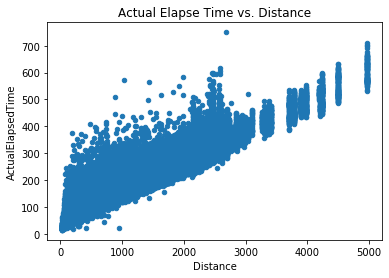

In [5]:
flights_2008_df.plot.scatter(y='ActualElapsedTime',x='Distance', title="Actual Elapse Time vs. Distance");

## ActualElapsedTime vs. Origin/Destination Airports

With these visualization for Actual Elapsed Time vs Origin and Destination Airports, I see that for the top 10 Origin airports, the most overall Elapsed times tend to be around 85-130 minutes. 9 out of the 10 top airports have outliers where the elapsed times are much higher than other flights from that airport. For the top 10 Destination airports, most of the Elapsed times tend to be around 100-170 minutes, which is slightly higher than the Origin visualization, and has less outlier times. 

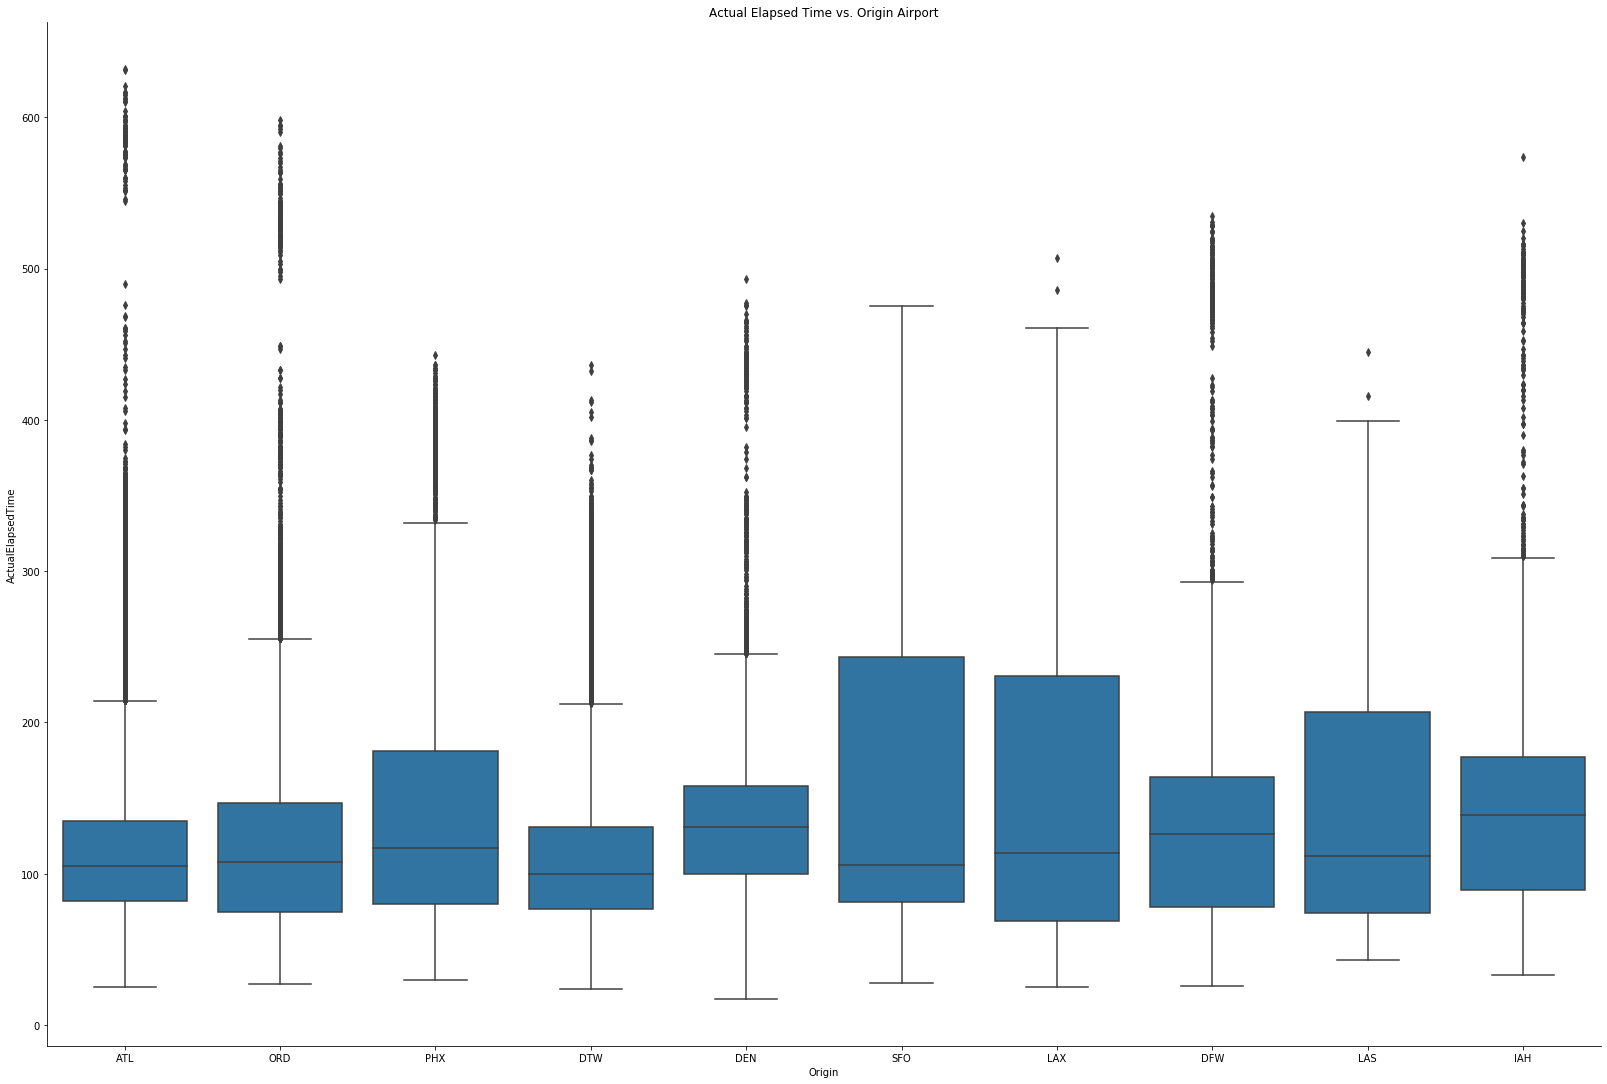

In [6]:
# plot matrix of numeric features against categorical feature
flights_2008_filtered_origin = flights_2008_df.query('Origin == "ATL" or Origin == "ORD" or Origin == "DFW" or Origin == "DEN" or Origin == "LAX" or Origin == "PHX" or Origin == "IAH" or Origin == "LAS" or Origin == "DTW" or Origin == "SFO"')

def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)


g = sb.PairGrid(data = flights_2008_filtered_origin, y_vars = ['ActualElapsedTime'], x_vars = ['Origin'],
                height = 15, aspect = 1.5);
g.map(boxgrid)
plt.title('Actual Elapsed Time vs. Origin Airport')
plt.show();

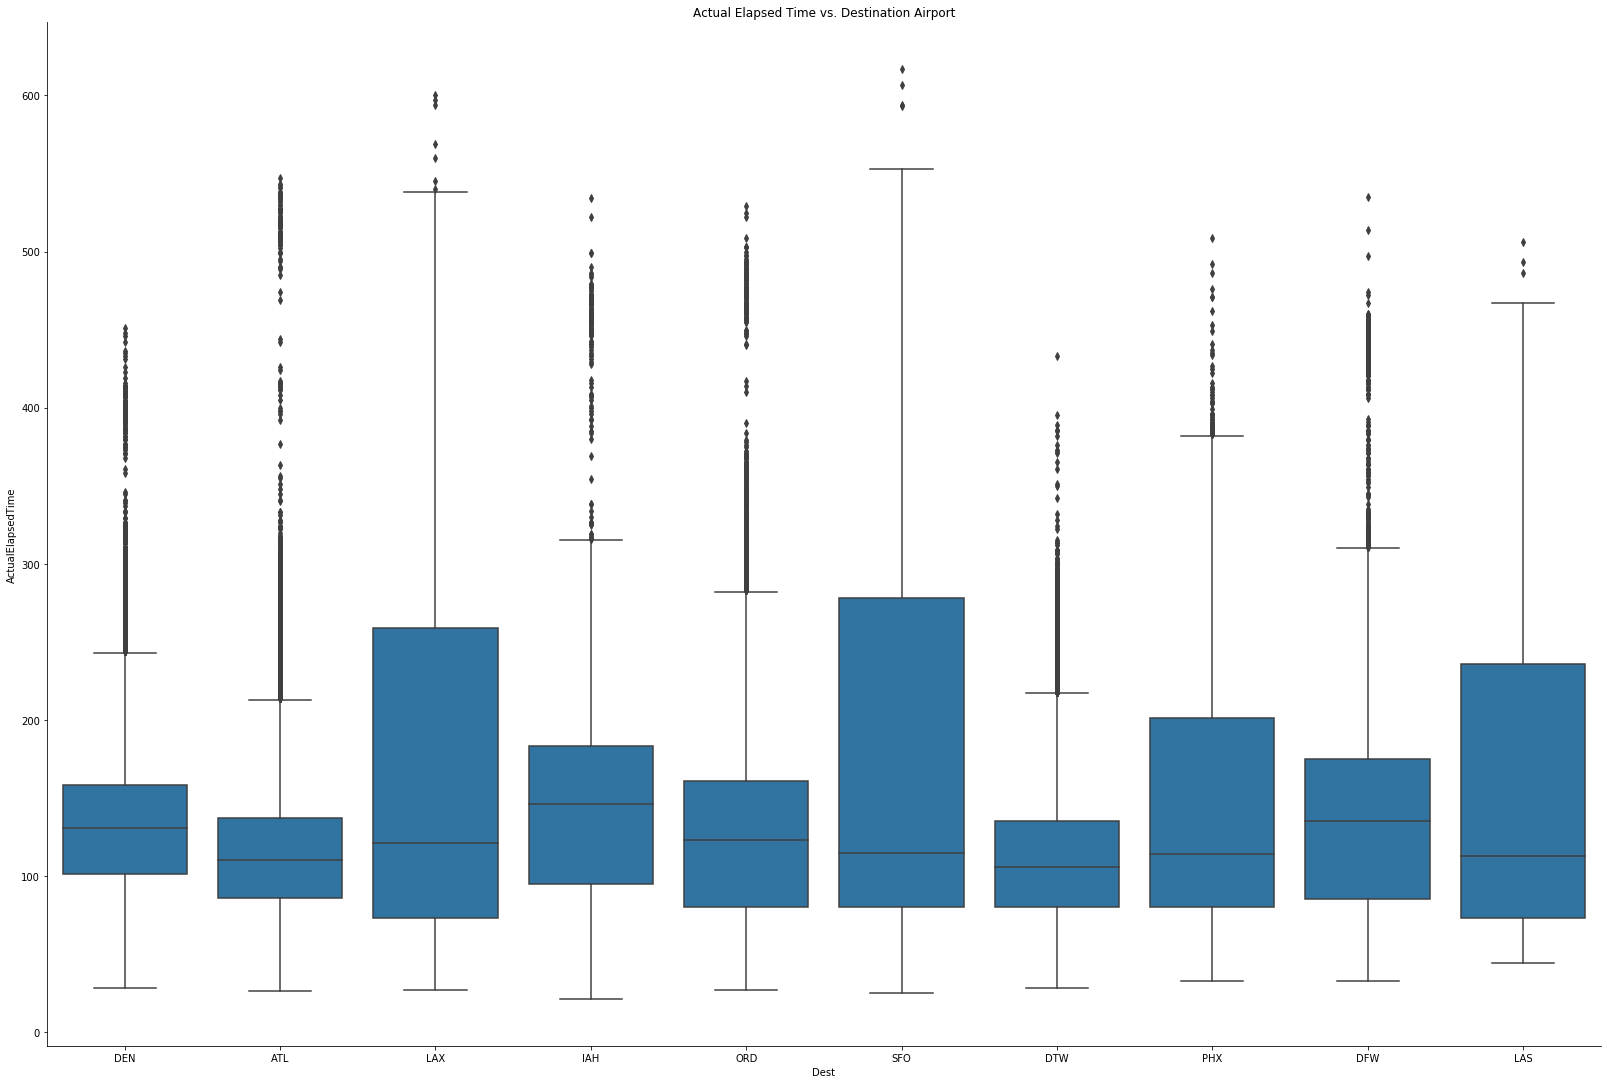

In [7]:
# plot matrix of numeric features against categorical feature
flights_2008_filtered_dest = flights_2008_df.query('Dest == "ATL" or Dest == "ORD" or Dest == "DFW" or Dest == "DEN" or Dest == "LAX" or Dest == "PHX" or Dest == "IAH" or Dest == "LAS" or Dest == "DTW" or Dest == "SFO"')
#print(flights_2008_filtered.head())

def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

g = sb.PairGrid(data = flights_2008_filtered_dest, y_vars = ['ActualElapsedTime'], x_vars = ['Dest'],
                height = 15, aspect = 1.5)
g.map(boxgrid)
plt.title('Actual Elapsed Time vs. Destination Airport')
plt.show();

## Actual Elapsed Time and Distance for each Orgin/Destination Airport

When analyzing the relationship of Actual Elapsed Time and Distance for each Origin/Destination Airport, I can see that most clouds of points tend to have an expected higher or lower amount of time that will have elapsed for different distances. Some airports tend to show a varied amount of elapsed time regardless of the distance, such as what I can see for IAH as an Origin or Destination, and DFW as Destination.

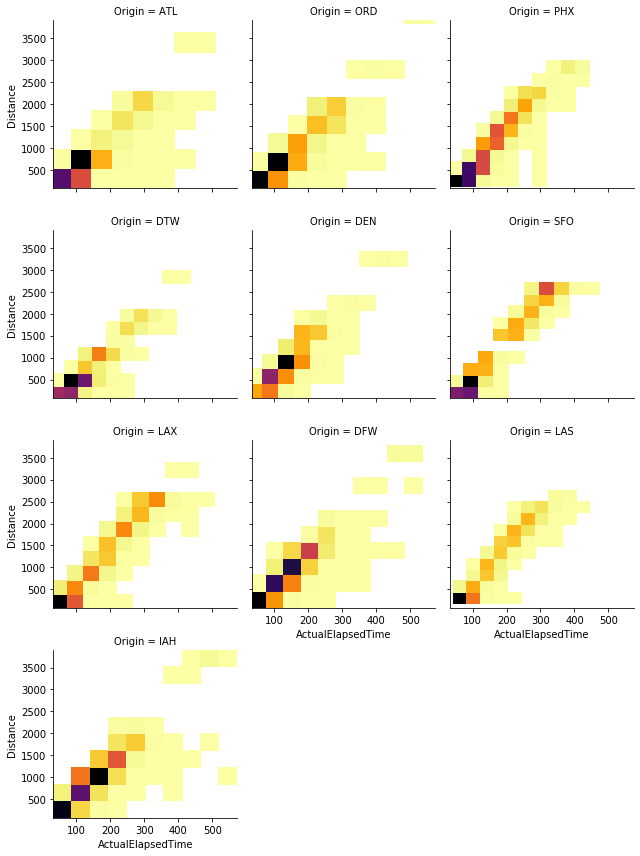

In [8]:
def hist2dgrid(x, y, **kwargs):
    palette = kwargs.pop('color')
    plt.hist2d(x, y, cmap = palette, cmin = 0.5)
    
g = sb.FacetGrid(data = flights_2008_filtered_origin, col = 'Origin', col_wrap = 3, size = 3)
g.map(hist2dgrid, 'ActualElapsedTime','Distance', color = 'inferno_r')
plt.show()

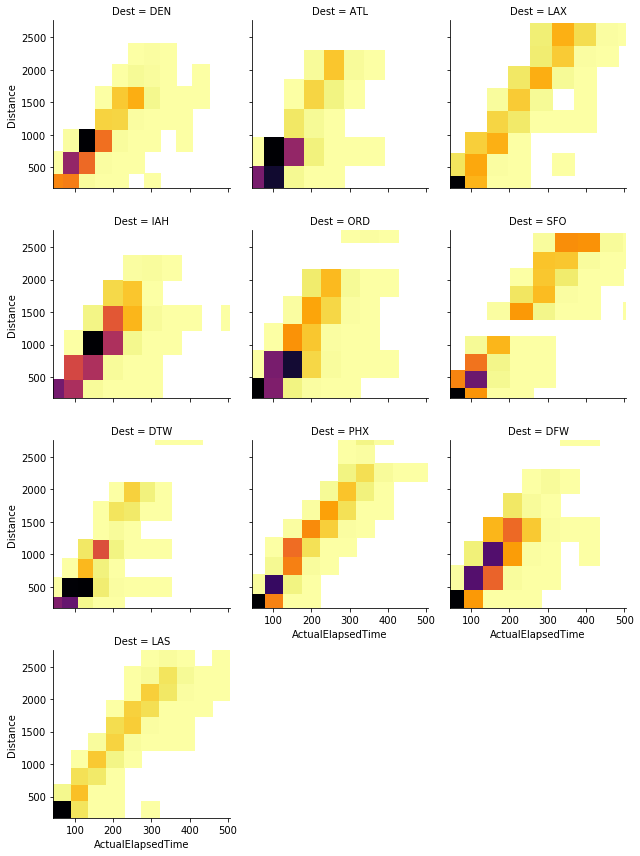

In [9]:
g = sb.FacetGrid(data = flights_2008_filtered_dest, col = 'Dest', col_wrap = 3, size = 3)
g.map(hist2dgrid, 'ActualElapsedTime','Distance', color = 'inferno_r')
plt.show()